<a href="https://colab.research.google.com/github/rpipptra/Project-Rekomendasi-iphone/blob/main/Kelompok15_RekomendasiIphone.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

To learn more about accelerating pandas on Colab, see the [10 minute guide](https://colab.research.google.com/github/rapidsai-community/showcase/blob/main/getting_started_tutorials/cudf_pandas_colab_demo.ipynb) or
 [US stock market data analysis demo](https://colab.research.google.com/github/rapidsai-community/showcase/blob/main/getting_started_tutorials/cudf_pandas_stocks_demo.ipynb).

In [ ]:
#Step 1: Baca data dari file txt
def load_data_from_txt(file_path):
    data = []
    with open(file_path, 'r') as f:
        for line in f:
            if ':' in line:
                name, specs = line.strip().split(" : ")
                price, ram, storage, battery, camera = specs.split(", ")
                data.append({
                    'name': name.strip(),
                    'price': int(price),
                    'ram': int(ram),
                    'storage': int(storage),
                    'battery': battery.strip(),
                    'camera': camera.strip()
                })
    return data

#Step 2: Decision tree manual (berdasarkan pertanyaan logis)
def recommend_iphone(data):
    print("=== Rekomendasi iPhone ===")
    print("Jawab pertanyaan dengan 'ya' atau 'tidak' sesuai preferensimu.")

    # Pertanyaan budget
    jawaban = input("Apakah budget kamu di bawah 5 juta? ").lower()
    if jawaban == "ya":
        print("Rekomendasi: iPhone 12 Mini atau iPhone SE")
        return

    jawaban = input("Apakah budget kamu di bawah 15 juta? ").lower()
    if jawaban == "ya":
        # Budget 5jt - 15jt
        jawaban = input("Apakah kamu ingin RAM minimal 6GB? ").lower()
        if jawaban == "tidak":
            print("Rekomendasi: iPhone 13 Mini atau iPhone 12 (RAM < 6GB)")
            return

        jawaban = input("Apakah kamu ingin Storage minimal 256GB? ").lower()
        if jawaban == "tidak":
            print("Rekomendasi: iPhone 12 / 13 / 14")
            return

        jawaban = input("Apakah kamu ingin kamera yang sangat bagus? ").lower()
        if jawaban == "ya":
            print("Rekomendasi: iPhone 14 Pro / 15 / 16")
        else:
            print("Rekomendasi: iPhone 12 / 13 / 14")
        return

    else:
        # Budget > 15jt
        jawaban = input("Apakah kamu ingin RAM minimal 8GB? ").lower()
        if jawaban == "tidak":
            print("Rekomendasi: iPhone 15 Plus / 16 Plus")
            return

        jawaban = input("Apakah kamu ingin Storage minimal 256GB? ").lower()
        if jawaban == "tidak":
            print("Rekomendasi: iPhone 15 Plus / 16 Plus")
            return

        jawaban = input("Apakah kamu ingin kamera yang sangat bagus? ").lower()
        if jawaban == "ya":
            print("Rekomendasi: iPhone 15 / 16 Pro / Pro Max")
        else:
            print("Rekomendasi: iPhone 15 Plus / 16 Plus")


#Ubah path ke lokasi file kamu di Google Colab
file_path = 'iphone_data.txt'

data = load_data_from_txt(file_path)
recommend_iphone(data)


=== Rekomendasi iPhone ===
Jawab pertanyaan dengan 'ya' atau 'tidak' sesuai preferensimu.
Apakah budget kamu di bawah 5 juta? tidak
Apakah budget kamu di bawah 15 juta? tidak
Apakah kamu ingin RAM minimal 8GB? ya
Apakah kamu ingin Storage minimal 256GB? ya
Apakah kamu ingin kamera yang sangat bagus? ya
Rekomendasi: iPhone 15 / 16 Pro / Pro Max


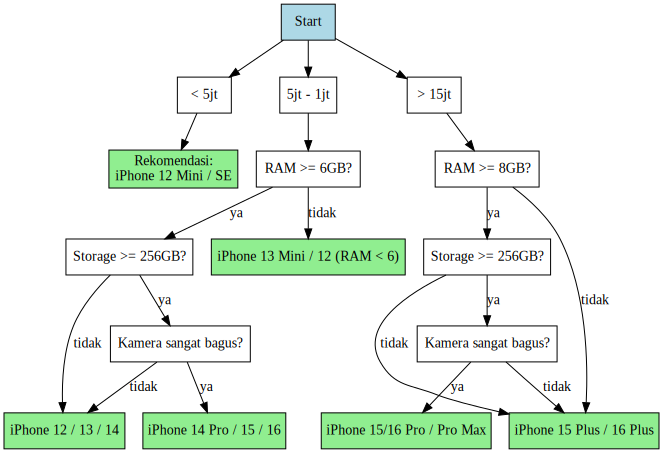

In [ ]:
from graphviz import Digraph

def visualisasi_tree_3_budget():
    dot = Digraph()
    dot.attr(rankdir='TB', size='12')

    # Start dan cabang Budget
    dot.node('Start', 'Start', shape='box', style='filled', fillcolor='lightblue')
    dot.node('Bawah5', '< 5jt', shape='box')
    dot.node('Tengah', '5jt - 1jt', shape='box')
    dot.node('Atas15', '> 15jt', shape='box')

    # Cabang setelah <5jt
    dot.node('R5', 'Rekomendasi:\niPhone 12 Mini / SE', shape='box', style='filled', fillcolor='lightgreen')

    # Cabang setelah 5–15jt
    dot.node('RAM1', 'RAM >= 6GB?', shape='box')
    dot.node('Storage1', 'Storage >= 256GB?', shape='box')
    dot.node('Camera1', 'Kamera sangat bagus?', shape='box')
    dot.node('R1', 'iPhone 12 / 13 / 14', shape='box', style='filled', fillcolor='lightgreen')
    dot.node('R2', 'iPhone 14 Pro / 15 / 16', shape='box', style='filled', fillcolor='lightgreen')
    dot.node('R3', 'iPhone 13 Mini / 12 (RAM < 6)', shape='box', style='filled', fillcolor='lightgreen')

    # Cabang setelah >15jt
    dot.node('RAM2', 'RAM >= 8GB?', shape='box')
    dot.node('Storage2', 'Storage >= 256GB?', shape='box')
    dot.node('Camera2', 'Kamera sangat bagus?', shape='box')
    dot.node('R4', 'iPhone 15/16 Pro / Pro Max', shape='box', style='filled', fillcolor='lightgreen')
    dot.node('R6', 'iPhone 15 Plus / 16 Plus', shape='box', style='filled', fillcolor='lightgreen')

    # Edges dari Start
    dot.edge('Start', 'Bawah5')
    dot.edge('Start', 'Tengah')
    dot.edge('Start', 'Atas15')

    # Bawah 5jt
    dot.edge('Bawah5', 'R5')

    # 5-15jt
    dot.edge('Tengah', 'RAM1')
    dot.edge('RAM1', 'Storage1', label='ya')
    dot.edge('RAM1', 'R3', label='tidak')
    dot.edge('Storage1', 'Camera1', label='ya')
    dot.edge('Storage1', 'R1', label='tidak')
    dot.edge('Camera1', 'R2', label='ya')
    dot.edge('Camera1', 'R1', label='tidak')

    # >15jt
    dot.edge('Atas15', 'RAM2')
    dot.edge('RAM2', 'Storage2', label='ya')
    dot.edge('RAM2', 'R6', label='tidak')
    dot.edge('Storage2', 'Camera2', label='ya')
    dot.edge('Storage2', 'R6', label='tidak')
    dot.edge('Camera2', 'R4', label='ya')
    dot.edge('Camera2', 'R6', label='tidak')

    return dot

# Simpan dan tampilkan
tree = visualisasi_tree_3_budget()
tree.render("tree_rekomendasi_budget_3_cabang", format="png", cleanup=True)
tree